# Feature Engineering(Rajshahi-2019 Dataset) 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

----------------------------------------------------------------

In [2]:
aqi_data = pd.read_csv("F:\\CLASS\\CSE498R(Directed Research)\\Dataset\\Rajshahi\\real_2019.csv")

In [3]:
aqi_data.head()

,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,AQI,Category
0,Jan-01,16.1,25,10,1019.4,76,0,5.3,4.3,9.4,325.0,EU
1,2,14.1,26,9.6,1019,79,0,5.3,2,3.5,178.0,U
2,3,13.2,24.6,8.4,1019.4,83,0,5.3,1.7,7.6,321.0,EU
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,U


In [4]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       276 non-null    object 
 1   T         186 non-null    object 
 2   TM        186 non-null    object 
 3   Tm        186 non-null    object 
 4   SLP       186 non-null    object 
 5   H         186 non-null    object 
 6   PP        186 non-null    object 
 7   VV        186 non-null    object 
 8   V         186 non-null    object 
 9   VM        186 non-null    object 
 10  AQI       233 non-null    float64
 11  Category  233 non-null    object 
dtypes: float64(1), object(11)
memory usage: 26.0+ KB


In [5]:
aqi_data.isnull().sum()

Day          0
T           90
TM          90
Tm          90
SLP         90
H           90
PP          90
VV          90
V           90
VM          90
AQI         43
Category    43
dtype: int64

In [6]:
aqi = aqi_data.replace("-",np.nan)
aqi

,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,AQI,Category
0,Jan-01,16.1,25,10,1019.4,76,0,5.3,4.3,9.4,325.0,EU
1,2,14.1,26,9.6,1019,79,0,5.3,2,3.5,178.0,U
2,3,13.2,24.6,8.4,1019.4,83,0,5.3,1.7,7.6,321.0,EU
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...
271,27,12.9,17.3,9.8,1016,88,0,4.5,2.8,5.4,245.0,VU
272,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0,VU
273,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.0,U
274,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.0,VU


In [7]:
aqi.isnull().sum()

Day           0
T           169
TM          169
Tm          169
SLP         169
H           169
PP          169
VV          169
V           169
VM          170
AQI          43
Category     43
dtype: int64

<AxesSubplot:>

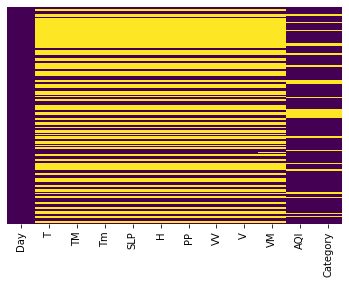

In [8]:
sns.heatmap(aqi.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
aqi = aqi.drop(['PP'], axis = 1)
aqi

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,16.1,25,10,1019.4,76,5.3,4.3,9.4,325.0,EU
1,2,14.1,26,9.6,1019,79,5.3,2,3.5,178.0,U
2,3,13.2,24.6,8.4,1019.4,83,5.3,1.7,7.6,321.0,EU
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,U
...,...,...,...,...,...,...,...,...,...,...,...
271,27,12.9,17.3,9.8,1016,88,4.5,2.8,5.4,245.0,VU
272,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0,VU
273,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.0,U
274,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.0,VU


In [10]:
aqi['T'] = aqi['T'].replace({'NAN':np.nan}).astype(float)
aqi['TM'] = aqi['TM'].replace({'NAN':np.nan}).astype(float)
aqi['Tm'] = aqi['Tm'].replace({'NAN':np.nan}).astype(float)
aqi['SLP'] = aqi['SLP'].replace({'NAN':np.nan}).astype(float)
aqi['H'] = aqi['H'].replace({'NAN':np.nan}).astype(float)
aqi['VV'] = aqi['VV'].replace({'NAN':np.nan}).astype(float)
aqi['V'] = aqi['V'].replace({'NAN':np.nan}).astype(float)
aqi['VM'] = aqi['VM'].replace({'NAN':np.nan}).astype(float)

# Month-1 (January)

In [11]:
df1 = aqi.iloc[0:31,0:11]
df1

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,16.1,25.0,10.0,1019.4,76.0,5.3,4.3,9.4,325.0,EU
1,2,14.1,26.0,9.6,1019.0,79.0,5.3,2.0,3.5,178.0,U
2,3,13.2,24.6,8.4,1019.4,83.0,5.3,1.7,7.6,321.0,EU
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422.0,EU
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,U
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.0,U
6,7,14.9,25.9,8.6,1014.4,81.0,5.5,2.0,5.4,225.0,VU
7,8,15.8,26.0,11.6,1013.8,75.0,5.3,2.2,7.6,179.0,U
8,9,15.8,25.8,9.2,1015.4,74.0,5.5,1.9,5.4,259.0,VU
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df1.isnull().sum()

Day          0
T           24
TM          24
Tm          24
SLP         24
H           24
VV          24
V           24
VM          24
AQI          5
Category     5
dtype: int64

In [13]:
df1["T"] = df1["T"].fillna(value=df1["T"].mean())
df1["TM"] = df1["TM"].fillna(value=df1["TM"].mean())
df1["Tm"] = df1["Tm"].fillna(value=df1["Tm"].mean())
df1["SLP"] = df1["SLP"].fillna(value=df1["SLP"].mean())
df1["H"] = df1["H"].fillna(value=df1["H"].mean())
df1["VV"] = df1["VV"].fillna(value=df1["VV"].mean())
df1["V"] = df1["V"].fillna(value=df1["V"].mean())
df1["VM"] = df1["VM"].fillna(value=df1["VM"].mean())
df1["AQI"] = df1["AQI"].fillna(value=df1["AQI"].mean())

In [14]:
df1

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,16.100000,25.000000,10.0,1019.400000,76.000000,5.300000,4.300000,9.400000,325.000000,EU
1,2,14.100000,26.000000,9.6,1019.000000,79.000000,5.300000,2.000000,3.500000,178.000000,U
2,3,13.200000,24.600000,8.4,1019.400000,83.000000,5.300000,1.700000,7.600000,321.000000,EU
3,4,15.371429,25.385714,9.6,1016.657143,76.571429,5.385714,2.457143,6.328571,422.000000,EU
4,5,15.371429,25.385714,9.6,1016.657143,76.571429,5.385714,2.457143,6.328571,182.000000,U
5,6,15.371429,25.385714,9.6,1016.657143,76.571429,5.385714,2.457143,6.328571,179.000000,U
6,7,14.900000,25.900000,8.6,1014.400000,81.000000,5.500000,2.000000,5.400000,225.000000,VU
7,8,15.800000,26.000000,11.6,1013.800000,75.000000,5.300000,2.200000,7.600000,179.000000,U
8,9,15.800000,25.800000,9.2,1015.400000,74.000000,5.500000,1.900000,5.400000,259.000000,VU
9,10,15.371429,25.385714,9.6,1016.657143,76.571429,5.385714,2.457143,6.328571,266.384615,NaN


In [15]:
df1.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    5
dtype: int64

# Month-5 (May)

In [18]:
df2 = aqi.iloc[31:62,0:11]
df2

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,May-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,G
32,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,C
33,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,M
34,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,G
35,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.0,C
36,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0,U
37,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.0,U
38,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,VU
39,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.0,VU
40,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0,VU


In [19]:
df2.isnull().sum()

Day          0
T           28
TM          28
Tm          28
SLP         28
H           28
VV          28
V           28
VM          28
AQI          6
Category     6
dtype: int64

In [20]:
df2["T"] = df2["T"].fillna(value=df2["T"].mean())
df2["TM"] = df2["TM"].fillna(value=df2["TM"].mean())
df2["Tm"] = df2["Tm"].fillna(value=df2["Tm"].mean())
df2["SLP"] = df2["SLP"].fillna(value=df2["SLP"].mean())
df2["H"] = df2["H"].fillna(value=df2["H"].mean())
df2["VV"] = df2["VV"].fillna(value=df2["VV"].mean())
df2["V"] = df2["V"].fillna(value=df2["V"].mean())
df2["VM"] = df2["VM"].fillna(value=df2["VM"].mean())
df2["AQI"] = df2["AQI"].fillna(value=df2["AQI"].mean())

In [21]:
df2

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
31,May-01,29.666667,35.366667,24.5,1003.666667,80.666667,5.966667,2.6,5.4,45.00,G
32,2,29.666667,35.366667,24.5,1003.666667,80.666667,5.966667,2.6,5.4,121.00,C
33,3,29.666667,35.366667,24.5,1003.666667,80.666667,5.966667,2.6,5.4,55.00,M
34,4,29.666667,35.366667,24.5,1003.666667,80.666667,5.966667,2.6,5.4,25.00,G
35,5,29.666667,35.366667,24.5,1003.666667,80.666667,5.966667,2.6,5.4,121.00,C
36,6,29.666667,35.366667,24.5,1003.666667,80.666667,5.966667,2.6,5.4,165.00,U
37,7,29.666667,35.366667,24.5,1003.666667,80.666667,5.966667,2.6,5.4,174.00,U
38,8,29.666667,35.366667,24.5,1003.666667,80.666667,5.966667,2.6,5.4,220.00,VU
39,9,29.666667,35.366667,24.5,1003.666667,80.666667,5.966667,2.6,5.4,214.00,VU
40,10,29.666667,35.366667,24.5,1003.666667,80.666667,5.966667,2.6,5.4,223.00,VU


In [22]:
df2.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    6
dtype: int64

# Month-6 (June)

In [23]:
df3 = aqi.iloc[62:92,0:11]
df3

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
62,Jun-01,30.6,35.0,27.0,1003.6,77.0,5.8,6.1,9.4,30.0,G
63,2,24.9,28.0,22.6,1004.8,91.0,5.3,4.1,7.6,27.0,G
64,3,27.3,31.8,24.0,1004.0,82.0,5.8,4.1,7.6,73.0,M
65,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,M
66,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,M
67,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,M
68,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,M
69,8,30.2,36.0,26.4,1003.2,75.0,6.0,3.7,7.6,57.0,M
70,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,G
71,10,31.9,37.0,28.0,1000.0,77.0,5.5,2.8,3.5,112.0,C


In [24]:
df3.isnull().sum()

Day          0
T           18
TM          18
Tm          18
SLP         18
H           18
VV          18
V           18
VM          18
AQI          3
Category     3
dtype: int64

In [25]:
df3["T"] = df3["T"].fillna(value=df3["T"].mean())
df3["TM"] = df3["TM"].fillna(value=df3["TM"].mean())
df3["Tm"] = df3["Tm"].fillna(value=df3["Tm"].mean())
df3["SLP"] = df3["SLP"].fillna(value=df3["SLP"].mean())
df3["H"] = df3["H"].fillna(value=df3["H"].mean())
df3["VV"] = df3["VV"].fillna(value=df3["VV"].mean())
df3["V"] = df3["V"].fillna(value=df3["V"].mean())
df3["VM"] = df3["VM"].fillna(value=df3["VM"].mean())
df3["AQI"] = df3["AQI"].fillna(value=df3["AQI"].mean())

In [26]:
df3

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
62,Jun-01,30.600000,35.000000,27.0,1003.60,77.000000,5.800,6.1,9.400000,30.000000,G
63,2,24.900000,28.000000,22.6,1004.80,91.000000,5.300,4.1,7.600000,27.000000,G
64,3,27.300000,31.800000,24.0,1004.00,82.000000,5.800,4.1,7.600000,73.000000,M
65,4,30.241667,35.083333,26.5,1000.65,80.166667,5.875,3.5,6.016667,92.000000,M
66,5,30.241667,35.083333,26.5,1000.65,80.166667,5.875,3.5,6.016667,85.000000,M
67,6,30.241667,35.083333,26.5,1000.65,80.166667,5.875,3.5,6.016667,63.000000,M
68,7,30.241667,35.083333,26.5,1000.65,80.166667,5.875,3.5,6.016667,59.000000,M
69,8,30.200000,36.000000,26.4,1003.20,75.000000,6.000,3.7,7.600000,57.000000,M
70,9,30.241667,35.083333,26.5,1000.65,80.166667,5.875,3.5,6.016667,31.000000,G
71,10,31.900000,37.000000,28.0,1000.00,77.000000,5.500,2.8,3.500000,112.000000,C


In [27]:
df3.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    3
dtype: int64

# Month-7 (July)

In [28]:
df4 = aqi.iloc[92:123,0:11]
df4

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
92,Jul-01,30.7,36.3,27.0,997.2,77.0,5.5,5.2,7.6,104.0,C
93,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,5,31.0,35.4,27.7,996.0,81.0,6.0,5.0,7.6,NaN,NaN
97,6,28.7,32.8,27.5,994.4,91.0,6.0,4.6,7.6,NaN,NaN
98,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,M
99,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,M
100,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,M
101,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,M


In [29]:
df4.isnull().sum()

Day          0
T           19
TM          19
Tm          19
SLP         19
H           19
VV          19
V           19
VM          19
AQI          6
Category     6
dtype: int64

In [33]:
df4["T"] = df4["T"].fillna(value=df4["T"].mean())
df4["TM"] = df4["TM"].fillna(value=df4["TM"].mean())
df4["Tm"] = df4["Tm"].fillna(value=df4["Tm"].mean())
df4["SLP"] = df4["SLP"].fillna(value=df4["SLP"].mean())
df4["H"] = df4["H"].fillna(value=df4["H"].mean())
df4["VV"] = df4["VV"].fillna(value=df4["VV"].mean())
df4["V"] = df4["V"].fillna(value=df4["V"].mean())
df4["VM"] = df4["VM"].fillna(value=df4["VM"].mean())
df4["AQI"] = df4["AQI"].fillna(value=df4["AQI"].mean())

In [34]:
df4

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
92,Jul-01,30.700000,36.300000,27.00,997.200000,77.000000,5.500000,5.200000,7.600000,104.0,C
93,2,29.483333,34.808333,26.65,999.808333,84.416667,5.791667,4.116667,6.841667,66.8,NaN
94,3,29.483333,34.808333,26.65,999.808333,84.416667,5.791667,4.116667,6.841667,66.8,NaN
95,4,29.483333,34.808333,26.65,999.808333,84.416667,5.791667,4.116667,6.841667,66.8,NaN
96,5,31.000000,35.400000,27.70,996.000000,81.000000,6.000000,5.000000,7.600000,66.8,NaN
97,6,28.700000,32.800000,27.50,994.400000,91.000000,6.000000,4.600000,7.600000,66.8,NaN
98,7,29.483333,34.808333,26.65,999.808333,84.416667,5.791667,4.116667,6.841667,73.0,M
99,8,29.483333,34.808333,26.65,999.808333,84.416667,5.791667,4.116667,6.841667,72.0,M
100,9,29.483333,34.808333,26.65,999.808333,84.416667,5.791667,4.116667,6.841667,64.0,M
101,10,29.483333,34.808333,26.65,999.808333,84.416667,5.791667,4.116667,6.841667,65.0,M


In [35]:
df4.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    6
dtype: int64

# Month-8(August)

In [36]:
df5 = aqi.iloc[123:154,0:11]
df5

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
123,Aug-01,30.0,34.8,27.4,999.9,84.0,5.5,3.1,3.5,42.0,G
124,2,30.7,35.5,27.5,999.1,81.0,5.8,3.5,5.4,30.0,G
125,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,M
126,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,M
127,5,31.9,36.6,28.0,995.4,78.0,6.0,0.9,3.5,79.0,M
128,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,M
129,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,G
130,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,9,30.6,35.8,26.6,1000.5,83.0,6.0,4.1,5.4,NaN,NaN
132,10,30.8,36.4,28.0,999.5,83.0,5.8,1.9,3.5,NaN,NaN


In [37]:
df5.isnull().sum()

Day          0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI         11
Category    11
dtype: int64

In [38]:
df5["T"] = df5["T"].fillna(value=df5["T"].mean())
df5["TM"] = df5["TM"].fillna(value=df5["TM"].mean())
df5["Tm"] = df5["Tm"].fillna(value=df5["Tm"].mean())
df5["SLP"] = df5["SLP"].fillna(value=df5["SLP"].mean())
df5["H"] = df5["H"].fillna(value=df5["H"].mean())
df5["VV"] = df5["VV"].fillna(value=df5["VV"].mean())
df5["V"] = df5["V"].fillna(value=df5["V"].mean())
df5["VM"] = df5["VM"].fillna(value=df5["VM"].mean())
df5["AQI"] = df5["AQI"].fillna(value=df5["AQI"].mean())

In [39]:
df5

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
123,Aug-01,30.000000,34.800000,27.400000,999.90,84.000000,5.500000,3.100000,3.500000,42.0,G
124,2,30.700000,35.500000,27.500000,999.10,81.000000,5.800000,3.500000,5.400000,30.0,G
125,3,30.293333,35.153333,27.326667,1001.18,83.133333,5.793333,2.886667,5.066667,52.0,M
126,4,30.293333,35.153333,27.326667,1001.18,83.133333,5.793333,2.886667,5.066667,64.0,M
127,5,31.900000,36.600000,28.000000,995.40,78.000000,6.000000,0.900000,3.500000,79.0,M
128,6,30.293333,35.153333,27.326667,1001.18,83.133333,5.793333,2.886667,5.066667,62.0,M
129,7,30.293333,35.153333,27.326667,1001.18,83.133333,5.793333,2.886667,5.066667,28.0,G
130,8,30.293333,35.153333,27.326667,1001.18,83.133333,5.793333,2.886667,5.066667,45.7,NaN
131,9,30.600000,35.800000,26.600000,1000.50,83.000000,6.000000,4.100000,5.400000,45.7,NaN
132,10,30.800000,36.400000,28.000000,999.50,83.000000,5.800000,1.900000,3.500000,45.7,NaN


In [40]:
df5.isnull().sum()

Day          0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    11
dtype: int64

# Month-9 (September)

In [41]:
df6 = aqi.iloc[154:184,0:11]
df6

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
154,Sep-01,31.4,36.2,27.4,1000.6,78.0,6.3,2.4,7.6,52.0,M
155,2,30.4,35.5,27.7,1000.9,86.0,6.0,2.2,3.5,50.0,G
156,3,30.5,34.5,28.1,1000.8,82.0,6.3,5.0,9.4,67.0,M
157,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,G
158,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,G
159,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,G
160,7,28.8,32.5,27.2,1000.5,87.0,5.5,6.3,11.1,42.0,G
161,8,29.1,32.8,26.9,1001.7,90.0,6.3,5.0,7.6,30.0,G
162,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,G
163,10,30.4,35.8,27.5,1001.2,85.0,5.5,3.1,5.4,65.0,M


In [42]:
df6.isnull().sum()

Day          0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          3
Category     3
dtype: int64

In [43]:
df6["T"] = df6["T"].fillna(value=df6["T"].mean())
df6["TM"] = df6["TM"].fillna(value=df6["TM"].mean())
df6["Tm"] = df6["Tm"].fillna(value=df6["Tm"].mean())
df6["SLP"] = df6["SLP"].fillna(value=df6["SLP"].mean())
df6["H"] = df6["H"].fillna(value=df6["H"].mean())
df6["VV"] = df6["VV"].fillna(value=df6["VV"].mean())
df6["V"] = df6["V"].fillna(value=df6["V"].mean())
df6["VM"] = df6["VM"].fillna(value=df6["VM"].mean())
df6["AQI"] = df6["AQI"].fillna(value=df6["AQI"].mean())

In [44]:
df6

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
154,Sep-01,31.400000,36.20,27.40,1000.600000,78.000000,6.30,2.400000,7.600000,52.000000,M
155,2,30.400000,35.50,27.70,1000.900000,86.000000,6.00,2.200000,3.500000,50.000000,G
156,3,30.500000,34.50,28.10,1000.800000,82.000000,6.30,5.000000,9.400000,67.000000,M
157,4,28.613333,33.42,26.56,1005.813333,87.533333,5.68,3.233333,5.893333,37.000000,G
158,5,28.613333,33.42,26.56,1005.813333,87.533333,5.68,3.233333,5.893333,36.000000,G
159,6,28.613333,33.42,26.56,1005.813333,87.533333,5.68,3.233333,5.893333,28.000000,G
160,7,28.800000,32.50,27.20,1000.500000,87.000000,5.50,6.300000,11.100000,42.000000,G
161,8,29.100000,32.80,26.90,1001.700000,90.000000,6.30,5.000000,7.600000,30.000000,G
162,9,28.613333,33.42,26.56,1005.813333,87.533333,5.68,3.233333,5.893333,43.000000,G
163,10,30.400000,35.80,27.50,1001.200000,85.000000,5.50,3.100000,5.400000,65.000000,M


In [45]:
df6.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    3
dtype: int64

# Month-10 (October)

In [46]:
df7 = aqi.iloc[184:215,0:11]
df7

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
184,Oct-01,26.7,30.3,24.6,1008.1,90.0,5.3,1.9,3.5,60.0,M
185,2,27.7,32.5,25.6,1009.1,86.0,6.0,0.0,NaN,93.0,M
186,3,26.8,32.8,24.5,1009.1,88.0,5.5,2.2,3.5,106.0,C
187,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,M
188,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,M
189,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,C
190,7,27.1,33.5,25.4,1010.2,87.0,5.3,1.3,3.5,102.0,C
191,8,26.7,32.0,24.9,1011.0,88.0,5.8,2.8,7.6,41.0,G
192,9,26.4,31.3,24.9,1011.1,92.0,6.0,2.2,3.5,33.0,G
193,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,M


In [47]:
df7.isnull().sum()

Day          0
T           18
TM          18
Tm          18
SLP         18
H           18
VV          18
V           18
VM          19
AQI          4
Category     4
dtype: int64

In [48]:
df7["T"] = df7["T"].fillna(value=df7["T"].mean())
df7["TM"] = df7["TM"].fillna(value=df7["TM"].mean())
df7["Tm"] = df7["Tm"].fillna(value=df7["Tm"].mean())
df7["SLP"] = df7["SLP"].fillna(value=df7["SLP"].mean())
df7["H"] = df7["H"].fillna(value=df7["H"].mean())
df7["VV"] = df7["VV"].fillna(value=df7["VV"].mean())
df7["V"] = df7["V"].fillna(value=df7["V"].mean())
df7["VM"] = df7["VM"].fillna(value=df7["VM"].mean())
df7["AQI"] = df7["AQI"].fillna(value=df7["AQI"].mean())

In [49]:
df7

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
184,Oct-01,26.700000,30.300000,24.600000,1008.100000,90.0,5.300000,1.900000,3.500000,60.00000,M
185,2,27.700000,32.500000,25.600000,1009.100000,86.0,6.000000,0.000000,4.358333,93.00000,M
186,3,26.800000,32.800000,24.500000,1009.100000,88.0,5.500000,2.200000,3.500000,106.00000,C
187,4,25.569231,30.584615,23.053846,1010.738462,87.0,5.615385,2.069231,4.358333,84.00000,M
188,5,25.569231,30.584615,23.053846,1010.738462,87.0,5.615385,2.069231,4.358333,69.00000,M
189,6,25.569231,30.584615,23.053846,1010.738462,87.0,5.615385,2.069231,4.358333,116.00000,C
190,7,27.100000,33.500000,25.400000,1010.200000,87.0,5.300000,1.300000,3.500000,102.00000,C
191,8,26.700000,32.000000,24.900000,1011.000000,88.0,5.800000,2.800000,7.600000,41.00000,G
192,9,26.400000,31.300000,24.900000,1011.100000,92.0,6.000000,2.200000,3.500000,33.00000,G
193,10,25.569231,30.584615,23.053846,1010.738462,87.0,5.615385,2.069231,4.358333,59.00000,M


In [50]:
df7.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    4
dtype: int64

# Month-11 (November)

In [51]:
df8 = aqi.iloc[215:245,0:11]
df8

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
215,Nov-01,25.1,31.3,20.8,1010.9,83.0,5.3,0.9,3.5,124.0,C
216,2,25.1,31.1,21.9,1011.7,79.0,5.8,3.1,5.4,117.0,C
217,3,25.5,31.2,22.5,1011.3,80.0,5.8,1.3,3.5,122.0,C
218,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.0,U
219,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.0,U
220,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.0,EU
221,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.0,U
222,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,U
223,9,23.9,25.3,22.8,1010.2,88.0,5.5,5.0,7.6,15.0,G
224,10,24.5,28.9,21.8,1009.2,86.0,5.3,4.6,9.4,15.0,G


In [52]:
df8.isnull().sum()

Day          0
T           16
TM          16
Tm          16
SLP         16
H           16
VV          16
V           16
VM          16
AQI          3
Category     3
dtype: int64

In [53]:
df8["T"] = df8["T"].fillna(value=df8["T"].mean())
df8["TM"] = df8["TM"].fillna(value=df8["TM"].mean())
df8["Tm"] = df8["Tm"].fillna(value=df8["Tm"].mean())
df8["SLP"] = df8["SLP"].fillna(value=df8["SLP"].mean())
df8["H"] = df8["H"].fillna(value=df8["H"].mean())
df8["VV"] = df8["VV"].fillna(value=df8["VV"].mean())
df8["V"] = df8["V"].fillna(value=df8["V"].mean())
df8["VM"] = df8["VM"].fillna(value=df8["VM"].mean())
df8["AQI"] = df8["AQI"].fillna(value=df8["AQI"].mean())

In [54]:
df8

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
215,Nov-01,25.100000,31.300000,20.800000,1010.900000,83.000000,5.300000,0.900000,3.500000,124.000000,C
216,2,25.100000,31.100000,21.900000,1011.700000,79.000000,5.800000,3.100000,5.400000,117.000000,C
217,3,25.500000,31.200000,22.500000,1011.300000,80.000000,5.800000,1.300000,3.500000,122.000000,C
218,4,23.121429,29.914286,19.221429,1012.471429,81.714286,5.407143,1.857143,4.507143,162.000000,U
219,5,23.121429,29.914286,19.221429,1012.471429,81.714286,5.407143,1.857143,4.507143,173.000000,U
220,6,23.121429,29.914286,19.221429,1012.471429,81.714286,5.407143,1.857143,4.507143,325.000000,EU
221,7,23.121429,29.914286,19.221429,1012.471429,81.714286,5.407143,1.857143,4.507143,198.000000,U
222,8,23.121429,29.914286,19.221429,1012.471429,81.714286,5.407143,1.857143,4.507143,160.000000,U
223,9,23.900000,25.300000,22.800000,1010.200000,88.000000,5.500000,5.000000,7.600000,15.000000,G
224,10,24.500000,28.900000,21.800000,1009.200000,86.000000,5.300000,4.600000,9.400000,15.000000,G


In [55]:
df8.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    3
dtype: int64

# Month-12 (December)

In [56]:
df9 = aqi.iloc[245:276,0:11]
df9

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
245,Dec-01,20.3,28.6,14.7,1015.2,75.0,5.3,1.5,5.4,192.0,U
246,2,19.5,27.5,13.9,1015.2,71.0,5.5,2.0,5.4,171.0,U
247,3,18.6,27.4,13.1,1015.8,79.0,5.3,2.0,3.5,170.0,U
248,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0,U
249,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,U
250,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,C
251,7,20.9,28.6,15.4,1016.8,80.0,5.3,1.1,3.5,203.0,VU
252,8,20.5,28.0,16.3,1016.8,77.0,5.6,1.1,3.5,152.0,U
253,9,19.4,27.6,14.6,1016.3,70.0,5.6,1.3,5.4,145.0,C
254,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.0,U


In [57]:
df9.isnull().sum()

Day          0
T           15
TM          15
Tm          15
SLP         15
H           15
VV          15
V           15
VM          15
AQI          2
Category     2
dtype: int64

In [58]:
df9["T"] = df9["T"].fillna(value=df9["T"].mean())
df9["TM"] = df9["TM"].fillna(value=df9["TM"].mean())
df9["Tm"] = df9["Tm"].fillna(value=df9["Tm"].mean())
df9["SLP"] = df9["SLP"].fillna(value=df9["SLP"].mean())
df9["H"] = df9["H"].fillna(value=df9["H"].mean())
df9["VV"] = df9["VV"].fillna(value=df9["VV"].mean())
df9["V"] = df9["V"].fillna(value=df9["V"].mean())
df9["VM"] = df9["VM"].fillna(value=df9["VM"].mean())
df9["AQI"] = df9["AQI"].fillna(value=df9["AQI"].mean())

In [59]:
df9

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
245,Dec-01,20.30000,28.600,14.700,1015.20000,75.000,5.30,1.50000,5.4,192.000000,U
246,2,19.50000,27.500,13.900,1015.20000,71.000,5.50,2.00000,5.4,171.000000,U
247,3,18.60000,27.400,13.100,1015.80000,79.000,5.30,2.00000,3.5,170.000000,U
248,4,17.40625,24.675,12.325,1016.30625,80.625,5.05,1.91875,5.1,183.000000,U
249,5,17.40625,24.675,12.325,1016.30625,80.625,5.05,1.91875,5.1,190.000000,U
250,6,17.40625,24.675,12.325,1016.30625,80.625,5.05,1.91875,5.1,131.000000,C
251,7,20.90000,28.600,15.400,1016.80000,80.000,5.30,1.10000,3.5,203.000000,VU
252,8,20.50000,28.000,16.300,1016.80000,77.000,5.60,1.10000,3.5,152.000000,U
253,9,19.40000,27.600,14.600,1016.30000,70.000,5.60,1.30000,5.4,145.000000,C
254,10,17.40625,24.675,12.325,1016.30625,80.625,5.05,1.91875,5.1,179.000000,U


In [60]:
df9.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    2
dtype: int64

In [61]:
data_frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
data = pd.concat(data_frames)
display(data)

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,16.100000,25.000000,10.000,1019.400000,76.000000,5.300000,4.300000,9.400000,325.0,EU
1,2,14.100000,26.000000,9.600,1019.000000,79.000000,5.300000,2.000000,3.500000,178.0,U
2,3,13.200000,24.600000,8.400,1019.400000,83.000000,5.300000,1.700000,7.600000,321.0,EU
3,4,15.371429,25.385714,9.600,1016.657143,76.571429,5.385714,2.457143,6.328571,422.0,EU
4,5,15.371429,25.385714,9.600,1016.657143,76.571429,5.385714,2.457143,6.328571,182.0,U
...,...,...,...,...,...,...,...,...,...,...,...
271,27,12.900000,17.300000,9.800,1016.000000,88.000000,4.500000,2.800000,5.400000,245.0,VU
272,28,17.406250,24.675000,12.325,1016.306250,80.625000,5.050000,1.918750,5.100000,221.0,VU
273,29,17.406250,24.675000,12.325,1016.306250,80.625000,5.050000,1.918750,5.100000,198.0,U
274,30,17.406250,24.675000,12.325,1016.306250,80.625000,5.050000,1.918750,5.100000,228.0,VU


In [63]:
data.isnull().sum()

Day          0
T            0
TM           0
Tm           0
SLP          0
H            0
VV           0
V            0
VM           0
AQI          0
Category    43
dtype: int64

# AQI Range

1. 0 - 50    = GOOD

2. 51 - 100  = MODERATE

3. 101 - 150 = CAUTION

4. 151 - 200 = UNHEALTHY

5. 201 - 300 = VERY UNHEALTHY

6. 301- 500 = EXTREMELY UNHEALTHY

In [64]:
data.loc[(data['AQI'] >= 0) & (data['AQI'] <= 50) & (data['Category'].isnull()), 'Category'] = "G"
data.loc[(data['AQI'] >= 51) & (data['AQI'] <= 100) & (data['Category'].isnull()), 'Category'] = "M"
data.loc[(data['AQI'] >= 101) & (data['AQI'] <= 150) & (data['Category'].isnull()), 'Category'] = "C"
data.loc[(data['AQI'] >= 151) & (data['AQI'] <= 200) & (data['Category'].isnull()), 'Category'] = "U"
data.loc[(data['AQI'] >= 201) & (data['AQI'] <= 300) & (data['Category'].isnull()), 'Category'] = "VU"
data.loc[(data['AQI'] >= 301) & (data['Category'].isnull()), 'Category'] = "EU"

In [65]:
data = data.round({'T':2,'TM':2,'Tm':2,'SLP':2,'H':2,'VV':2,'V':2,'VM':2,'AQI':0})
data

,Day,T,TM,Tm,SLP,H,VV,V,VM,AQI,Category
0,Jan-01,16.10,25.00,10.00,1019.40,76.00,5.30,4.30,9.40,325.0,EU
1,2,14.10,26.00,9.60,1019.00,79.00,5.30,2.00,3.50,178.0,U
2,3,13.20,24.60,8.40,1019.40,83.00,5.30,1.70,7.60,321.0,EU
3,4,15.37,25.39,9.60,1016.66,76.57,5.39,2.46,6.33,422.0,EU
4,5,15.37,25.39,9.60,1016.66,76.57,5.39,2.46,6.33,182.0,U
...,...,...,...,...,...,...,...,...,...,...,...
271,27,12.90,17.30,9.80,1016.00,88.00,4.50,2.80,5.40,245.0,VU
272,28,17.41,24.68,12.32,1016.31,80.62,5.05,1.92,5.10,221.0,VU
273,29,17.41,24.68,12.32,1016.31,80.62,5.05,1.92,5.10,198.0,U
274,30,17.41,24.68,12.32,1016.31,80.62,5.05,1.92,5.10,228.0,VU


In [66]:
data.isnull().sum()

Day         0
T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
AQI         0
Category    0
dtype: int64

<AxesSubplot:>

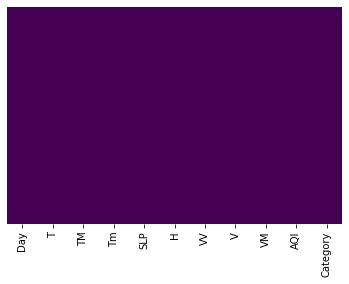

In [67]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
data.to_csv(r'F:\CLASS\CSE498R(Directed Research)\Dataset\RajshahiNew\Data-2019.csv', index=False)